pip install scikit-learn pydotplus graphviz


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO
from sklearn import tree
from sklearn.datasets import make_blobs


n_samples=10000


centers=[(0.9,0.05),(0.05,0.94)]


X,y=make_blobs(n_samples=n_samples,n_features=2,cluster_std=0.4,centers=centers,shuffle=False,random_state=42)


#Then Filler out only the values that lie within [0,1]

features=[]
labels=[]


for feature, label in zip(X,y):
  if(feature[0]>=0 and feature[0] <=1.0 and feature[1]>=0 and feature[1]<=1.0):
    features.append(feature)
    labels.append(label)

In [35]:
clf =tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [33]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                feature_names=['Distance', 'Bump Size'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.933107 to fit



[0 0 0 ... 1 1 1]


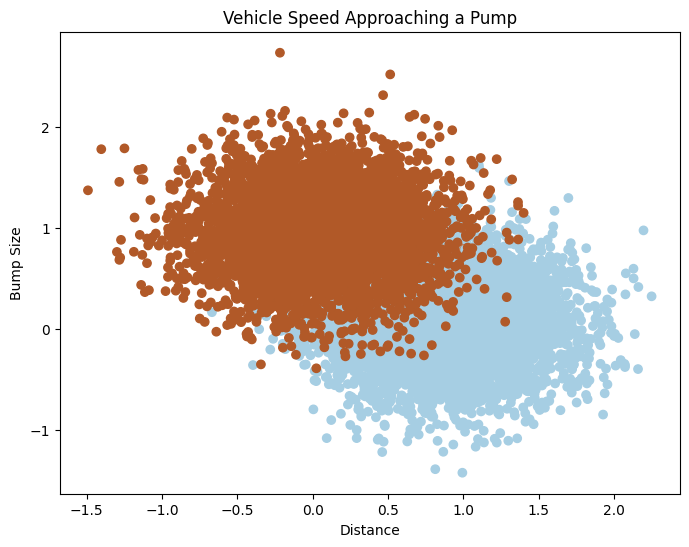

In [44]:
def plotPred(clf, X, y):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                         np.arange(0, 1.0, 0.001))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points)
    print(Z)
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title('Vehicle Speed Approaching a Pump')
    plt.show()


plotPred(clf,X,y)

NameError: ignored

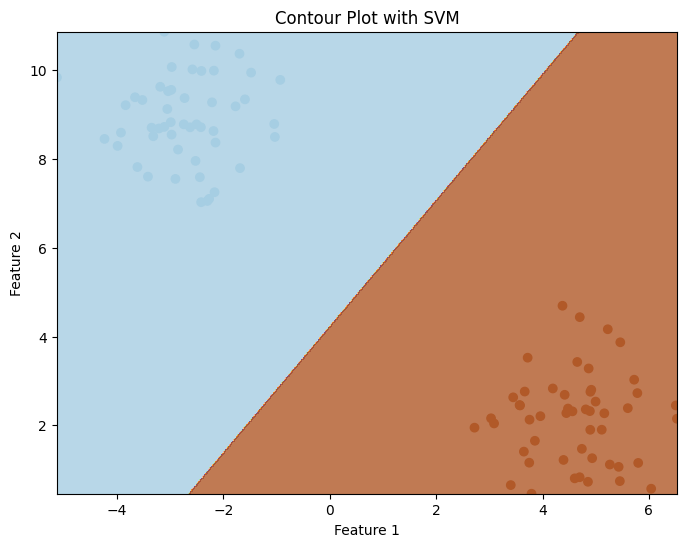

In [34]:
from sklearn.svm import SVC

def plotPred(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Contour Plot with SVM')
    plt.show()

# Generate example data
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Train a simple SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Call the function to plot
plotPred(clf, X, y)
